In [50]:
import pandas as pd  # 导入pandas库，用于数据处理和分析
import numpy as np  # 导入numpy库，用于数值计算
import xgboost as xgb  # 导入XGBoost库，用于梯度提升决策树模型
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier  # 导入决策树回归和分类模型
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # 导入随机森林、AdaBoost和梯度提升模型
from sklearn import preprocessing #数据预处理：归一化

from sklearn.metrics import mean_absolute_error, r2_score  # 导入评估指标，包括平均绝对误差和R^2分数

import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图
plt.rcParams['font.sans-serif']=[u'SimHei']#解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False
import warnings  # 导入警告处理库
warnings.filterwarnings('ignore')  # 忽略警告信息
from math import sqrt  # 导入数学库中的平方根函数

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)  # 将输入的实际值和预测值转换为NumPy数组
    tt1 = (actual - pred) / actual  # 计算相对误差
    tt2 = np.isfinite(tt1)  # 检查相对误差中是否有无穷大值
    tt3 = tt1[tt2]  # 去除无穷大值
    return np.mean(np.abs(tt3)) * 100  # 计算平均绝对百分比误差（MAPE）并返回


In [54]:
df=pd.read_excel('data1.xlsx')
X =df[df.columns[2:8]]
Y =df[df.columns[1]]
print(X)
print(Y)

#归一化
X = (X - X.min()) / (X.max() - X.min())
Y = (Y - Y.min()) / (Y.max() - Y.min())

   出生率(‰)  死亡率(‰)  人口老龄化率(%)  高校招生人数（万人）    性别比  流动人口数（万人）
0   14.03    6.45        7.0      233.45  48.37      12107
1   13.38    6.43        7.1      284.82  48.54      12604
2   12.86    6.41        7.3      340.76  48.53      12988
3   12.41    6.40        7.5      410.09  48.50      13544
4   12.29    6.42        7.6      479.93  48.48      14003
5   12.40    6.51        7.7      540.98  48.47      14735
0    126743
1    127627
2    128453
3    129227
4    129988
5    130756
Name: 总人口(万人), dtype: int64


In [55]:

from scipy.stats import shapiro

# 正态分布检测
def test_normality(dataframe):
    results = {}
    for column in dataframe.columns:
        stat, p_value = shapiro(dataframe[column])
        results[column] = {'Statistic': stat, 'p-value': p_value, 'Normal Distribution': p_value > 0.05}
    return results

# 对df的每列数据进行正态分布检测
normality_test_results = test_normality(df)
normality_test_results


{'年份': {'Statistic': 0.9818894863128662,
  'p-value': 0.9605551362037659,
  'Normal Distribution': True},
 '总人口(万人)': {'Statistic': 0.9836377501487732,
  'p-value': 0.9681457877159119,
  'Normal Distribution': True},
 '出生率(‰)': {'Statistic': 0.8668074011802673,
  'p-value': 0.2137729525566101,
  'Normal Distribution': True},
 '死亡率(‰)': {'Statistic': 0.8649718761444092,
  'p-value': 0.20688724517822266,
  'Normal Distribution': True},
 '人口老龄化率(%)': {'Statistic': 0.940091609954834,
  'p-value': 0.6599370241165161,
  'Normal Distribution': True},
 '高校招生人数（万人）': {'Statistic': 0.9712461829185486,
  'p-value': 0.9006987810134888,
  'Normal Distribution': True},
 '性别比': {'Statistic': 0.8757383823394775,
  'p-value': 0.2500523328781128,
  'Normal Distribution': True},
 '流动人口数（万人）': {'Statistic': 0.9850040078163147,
  'p-value': 0.9735586643218994,
  'Normal Distribution': True}}

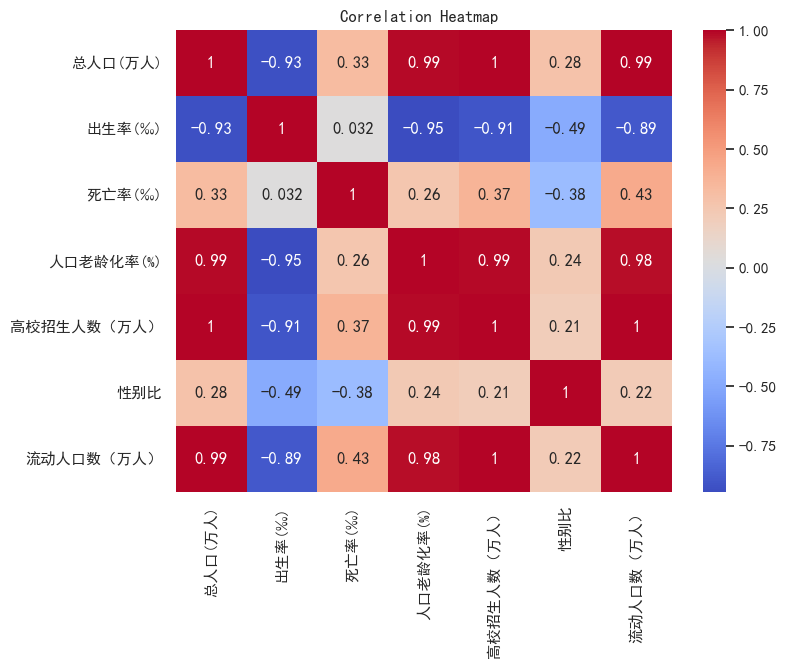

In [56]:
import seaborn as sns  # 导入seaborn库，用于绘制热力图

# 计算每个数据集的斯皮尔曼相关系数
corr_df = df[df.columns[1:8]].corr()  # 计算数据的相关系数

# 定义用于绘制热力图的函数
def plot_heatmap(corr, title):
    plt.figure(figsize=(8, 6))  # 创建一个图表，设置图表的大小
    sns.heatmap(corr, annot=True, cmap='coolwarm')  # 绘制热力图，设置显示相关系数数值和颜色映射
    plt.title(title)  # 设置图表标题
    plt.show()  # 显示图表

# 绘制每个数据集的热力图
plot_heatmap(corr_df, "Correlation Heatmap ")  # 绘制数据的相关性热力图

In [81]:
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X, Y)
xgb_y_pred = xgb_model.predict(X)
# 输出xgboost模型评价结果
print('1.XGBoost模型结果：')
print("  平均绝对百分比误差:",mape(Y, xgb_y_pred))
print("  r2_score",r2_score(Y,xgb_y_pred))


# 构建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, Y)
tree_y_pred = tree_model.predict(X)
# 输出决策树模型评价结果
print('2.决策树模型结果：')
print("  平均绝对百分比误差:",mape(Y, tree_y_pred))
print("  r2_score",r2_score(Y,tree_y_pred))


# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X, Y)
rf_y_pred = rf_model.predict(X)
# 输出随机森林模型评价结果
print('3.随机森林模型结果：')
print("  平均绝对百分比误差:",mape(Y, rf_y_pred))
print("  r2_score",r2_score(Y,rf_y_pred))


# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(X, Y)
ada_y_pred = ada_model.predict(X)
# 输出Adaboost模型评价结果
print('4.Adaboost模型结果：')
print("  平均绝对百分比误差:",mape(Y, ada_y_pred))
print("  r2_score",r2_score(Y,ada_y_pred))


# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
gbdt_y_pred = gbdt_model.predict(X)
# 输出GBDT模型评价结果
print('5.GBDT模型结果：')
print("  平均绝对百分比误差:",mape(Y, gbdt_y_pred))
print("  r2_score",r2_score(Y,gbdt_y_pred))

1.XGBoost模型结果：
  平均绝对百分比误差: 0.11863851528063135
  r2_score 0.9999698605262693
2.决策树模型结果：
  平均绝对百分比误差: 0.0
  r2_score 1.0
3.随机森林模型结果：
  平均绝对百分比误差: 7.652498896974044
  r2_score 0.940395521651645
4.Adaboost模型结果：
  平均绝对百分比误差: 0.0
  r2_score 1.0
5.GBDT模型结果：
  平均绝对百分比误差: 0.001357026503494273
  r2_score 0.9999999992944921


In [92]:
import shap
explainer = shap.Explainer(gbdt_model) # 初始化解释器
shap.initjs() #初始化JS
shap_values = explainer.shap_values(X) #计算每个样本的每个特征的SHAP值

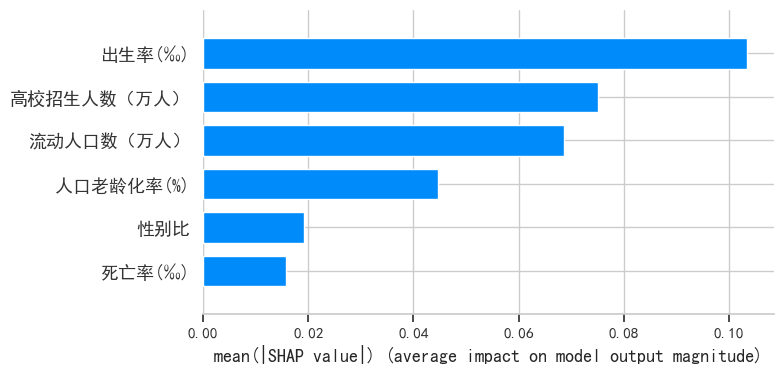

In [93]:
#指标重要性
shap.summary_plot(shap_values, X,  plot_type="bar",)

In [98]:
shap.force_plot(explainer.expected_value, 
                shap_values[3,:], 
                X.iloc[2,:], figsize=(4,3))

,出生率(‰),死亡率(‰),人口老龄化率(%),高校招生人数（万人）,性别比,流动人口数（万人）
0,-0.184429,-0.019554,-0.071408,-0.129012,0.007697,-0.115615
1,-0.081801,-0.003912,-0.050965,-0.061122,-0.009777,-0.084467
2,-0.041934,0.003928,-0.013090,-0.029017,0.003382,-0.009487
3,0.078221,-0.030448,0.018434,0.046009,-0.037678,0.032111
4,0.111858,-0.001450,0.044638,0.073768,-0.004979,0.072443
5,0.122405,0.034844,0.069339,0.111432,0.051971,0.097660


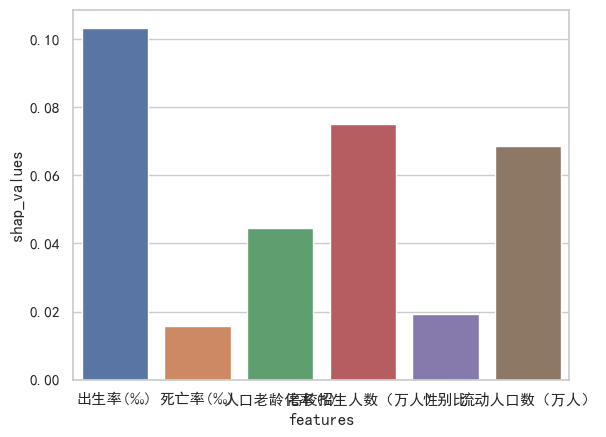

In [85]:
import seaborn as sns
# 初始化SHAP模型
explainer = shap.Explainer(gbdt_model)

# 计算SHAP值
shap_values = explainer(X)

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
display(shap_df)
# 输出每个特征的SHAP值（绝对值）
features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
    
ddf=pd.DataFrame(features,columns=['features'])
ddf['shap_values']=abs_mean_shap_values

sns.barplot(x='features', y='shap_values', data=ddf)
# 显示图形
plt.show()